# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement

Expanding its subscription base is a top priority for E-news Express, an online news site. The organization intends to assess user interests and determine how to promote higher engagement by observing the specific activities each visitor to the website takes depending on their own interests. Executives at E-news Express believe that the current webpage's design, particularly with regards to the outline and recommended content, is not good enough to keep customers engaged long enough to make a decision to subscribe, which has resulted in a decline in new monthly subscribers compared to the past year.

### Objectives
Statistical analysis of business data. Explore the dataset and extract insights from the data.
- Do the users spend more time on the new landing page than on the existing landing page? 
- Is the conversion rate for the new page greater than the conversion rate for the old page? 
- Does the converted status depend on the preferred language? 
- Is the time spent on the new page the same for the different language users? 

## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')
# Create copy of original data to work on to avoid any changes to the original.
data=df.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
#View the first and last 5 rows of the dataset.
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# view the last 5 rows of the dataset
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
# view the shape of the dataset
data.shape

(100, 6)

### Observations:
The dataframe have 100 rows and 6 columns

In [6]:
# Outputs the summary statistics of the dataset
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Observations:
On the dataset we have: 
1. A mean of 5.38 minutes for "time_spent_on_the_page" column 
2. A Standard deviation of 2.38 minutes 
3. The column "time_spent_on_the_page" is the only numerical variable with float type
4. Inter-quartile range includes:
- Min = 0.19
- 25% quartile = 3.88
- 50% quartile = 5.42
- 75% quartile = 7.02
- Max = 10.71

In [7]:
# check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
- user_id, time_spent_on_the_page are numerical
- group, landing page, converted and language_preferred are object

### Fixing the Data types
Converts 'group', 'landing_page', 'converted', 'language_preferred' into categorical data to reduce the data space required to store the dataframe


In [8]:
for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    data[col] = data[col].astype('category')

# use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


### Getting the statistical summary for the categorical variables

In [9]:
data.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


### Observations:
- We have 100 unique users. 
- Users are equally divided into 2 groups: Control and Treatment. 
- Users are exposed to 2 different types of landing pages: Old and New. 
- Users are divided by 3 different preferred languages. 
- The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54.

In [10]:
data['language_preferred'].unique()

['Spanish', 'English', 'French']
Categories (3, object): ['English', 'French', 'Spanish']

### Observation:
The feature "language preferred" has 3 unique values spanish, english, and french, with french having the highest frequency of 34.

In [11]:
# Check for missing values
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

0

### Observation:
There are no missing values and duplicates.

### Univariate Analysis

#### Time spent on the page

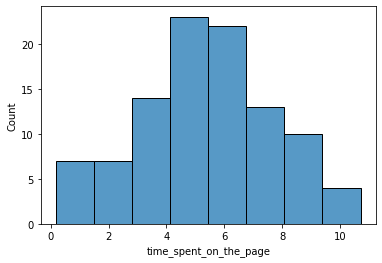

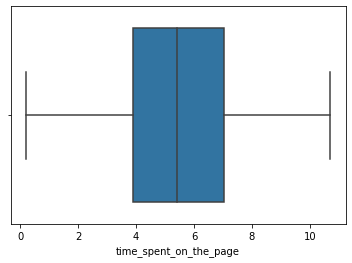

In [13]:
sns.histplot(data=data,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=data,x='time_spent_on_the_page')
plt.show()

### Observations:
- The boxplot shows no outliers 
- The data follows a normal distribution 
- Mean, median and mode are seems too close each other (about 5.38 minutes)

#### Group

In [14]:
data['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

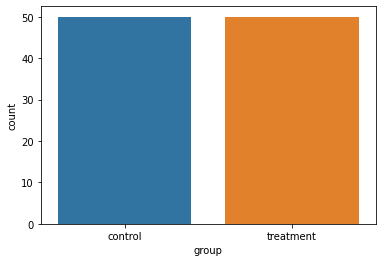

In [15]:
sns.countplot(data=data,x='group')
plt.show()

### Observation:
The feature "group" has 2 unique values control and treatment groups which are distributed equally with 50 for each one

#### Landing page

In [16]:
data['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

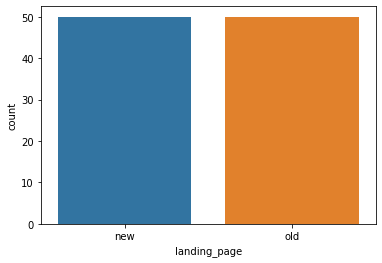

In [17]:
sns.countplot(data=data,x='landing_page')
plt.show()

### Observation:
The feature "landing page" has 2 unique values old and new groups which are distributed equally with 50 for each one

#### Converted

In [18]:
data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

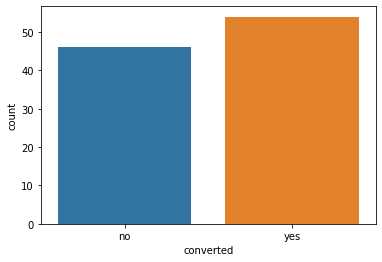

In [19]:
sns.countplot(data=data,x='converted')
plt.show()

### Observations:
- Group column has only two values "yes" and "no" 
- The frequency for yes is higher than for no (54 vs 46)

#### Language preferred

In [20]:
data['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

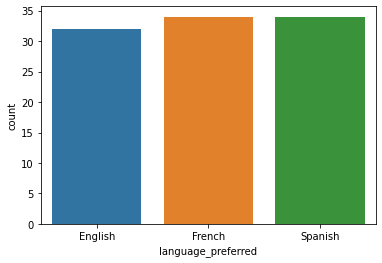

In [21]:
sns.countplot(data=data,x='language_preferred')
plt.show()

### Observations:
- The feature "language preferred" has 3 unique values spanish, english, and french, with both french and spanish having the highest frequencies of 34.
- English language is the less preferred.

### Bivariate Analysis

#### Group vs Time spent on the page

In [22]:
data.groupby(['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

<AxesSubplot:xlabel='group', ylabel='time_spent_on_the_page'>

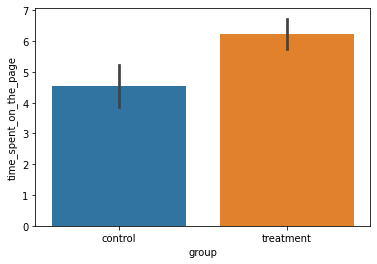

In [23]:
sns.barplot(data = data, x = 'group', y = 'time_spent_on_the_page')

### Observation:
The treatment group(those exposed to the new landing page) are more likely to spend more time on the page.

#### Landing page vs Time spent on the page

In [24]:
data.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

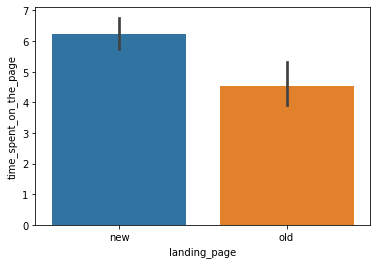

In [25]:
sns.barplot(data = data, x = 'landing_page', y = 'time_spent_on_the_page')

### Observation:
Users exposed to the new landing page spend more time on average than those on the old landing page.

#### Conversion status vs Time spent on the page

In [26]:
data.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

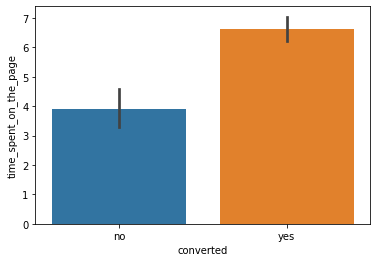

In [27]:
sns.barplot(data = df, x ='converted', y ='time_spent_on_the_page')
plt.show()

### Observation:
- Those users that decided to be subscribers of the new page on average spent more time on the page as compared to those who did not convert.

#### Language preferred vs Time spent on the page

In [28]:
data.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='language_preferred'>

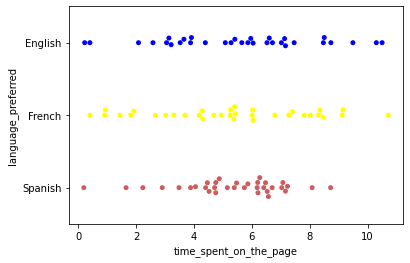

In [29]:
sns.swarmplot(x="time_spent_on_the_page", y="language_preferred", palette=["blue","yellow", "indianred"], data=data)

### Observations:
- Among the different languages English, French, and Spanish the average time spent on the page seems relatively the same.
- More English language readers converted to subscribers as compared to the other two languages, although the difference is negligible.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

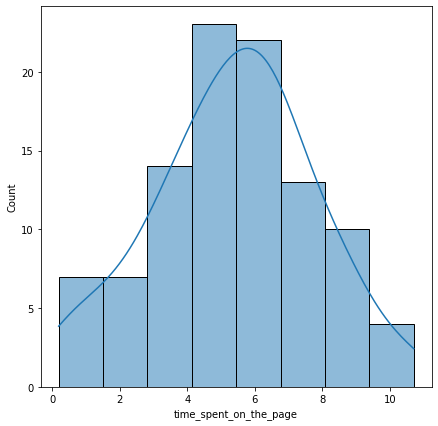

In [30]:
plt.figure(figsize=(7, 7))
sns.histplot(data.time_spent_on_the_page,kde=True);
plt.show()

### Observation:
- The time spent on the web pages presents a normal distribution and the most common time falls between 5 and 7 minutes.

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

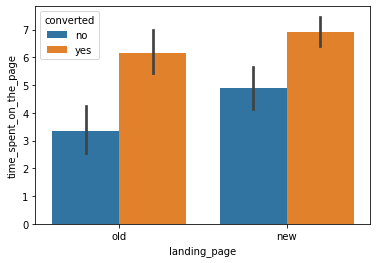

In [31]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', hue = 'converted')

#### Observations: 
- The barplot shows that visitors to the new landing page are more likely to convert than visitors to the old landing page.
- Those who do convert demonstrate higher time averages.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:
- $H_0:$ Null Hypothesis:  Users spend equal time on the old and new landing page.
- $H_a:$ Alternate Hypothesis:  Users spend greater amount of time on the new landing page.

Let $\mu_1$ and $\mu_2$  the mean time spent on the old and new landing page respectively.
Mathematically, the null and alternate hypotheses can be written as

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 < \mu_2 $

### Step 2: Select Appropriate test

In [32]:
data2 = data[["time_spent_on_the_page", "landing_page"]].copy()
data2.columns

Index(['time_spent_on_the_page', 'landing_page'], dtype='object')

In [33]:
# estimate the mean and standard deviation for new landing page
new_time1 = data2[data2["landing_page"] == "new"]["time_spent_on_the_page"].mean()
print(new_time1)

new_time2 = data2[data2["landing_page"] == "new"]["time_spent_on_the_page"].std()
print(new_time2)

6.2232
1.8170310387878263


In [34]:
# estimate the mean and standard deviation for old landing page
old_time1 = data2[data2["landing_page"] == "old"]["time_spent_on_the_page"].mean()
print(old_time1)

old_time2 = data2[data2["landing_page"] == "old"]["time_spent_on_the_page"].std()
print(old_time2)

4.532400000000001
2.581974849306046


- Based on the hisplot, the time spent on landing pages is measured on a continuous scale.
- Looking at the histogram probability density curves, as well as considering larger sample sizes of 50 (Landing page size), normal distribution assumption holds.
- Independent populations - As we are taking random samples from population for two different groups (old and new group), the two samples are assumed to be independent.
- Since the sample standard deviations are different, the population standard deviations may be assumed to be different.

##### Based on the assumptions above we can use two sample T-test for this problem 

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [35]:
# From step 2 we have:
print("The New page mean is:", round (new_time1,2))
print("The New page standard deviation is:", round(new_time2, 2))
print("The Old page mean is:", round (old_time1,2))
print("The Old page standard deviation is:", round(old_time2, 2))

The New page mean is: 6.22
The New page standard deviation is: 1.82
The Old page mean is: 4.53
The Old page standard deviation is: 2.58


### Step 5: Calculate the p-value

In [36]:
# create subsetted data frame for new and old landing page users
from scipy.stats import ttest_ind
new_time = data2[data2["landing_page"] == "new"]["time_spent_on_the_page"]
old_time = data2[data2["landing_page"] == "old"]["time_spent_on_the_page"]

In [37]:
# calculate the p-value
test_stat, p_value = ttest_ind(new_time, old_time, equal_var = False, alternative = "greater")
print("The p-value is:", p_value)

The p-value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [38]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

In this scenario, the p value is 0.00014 which is less than the 0.05. Hence, we reject the null hypothesis.

This means that Users spend greater amount of time on the new landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

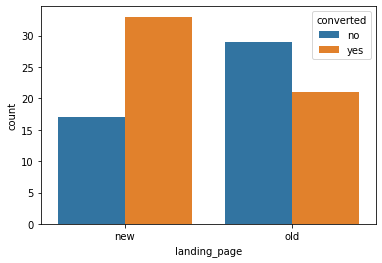

In [39]:
sns.countplot(data = data, x="landing_page",hue="converted");

### Observation:
- visually, users engaging with the new landing page are more likely to convert than those using the old landing page.
- "landing_page" and "converted" are two categorical variables. 

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:
- $H_0:$ Null Hypothesis: The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is the same as the conversion rate for the old page. 
- $H_a:$ Alternate Hypothesis: The conversion rate for the new page is greater than the conversion rate for the old page.

Let p1 and p2 be the conversion rates for the old and time landing pages
Mathematically, the null and alternate hypotheses can be written as

$H_0: p1 = p2 $

$H_a: p1 < p2 $

### Step 2: Select Appropriate test

In [40]:
#find the number of users who converted among both groups, old landing page and new landing page
data.groupby(['landing_page'])['converted'].value_counts()

landing_page     
new           yes    33
              no     17
old           no     29
              yes    21
Name: converted, dtype: int64

### Observations:
- Test for equality of two population proportions 
- Independent Populations (Old and new landing pages)

Due to the fulfilment of the above 2 qualities, the Two proportions z-test selected.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [41]:
# get the number of converted users in the groups
new_converted = data[data["group"] == "treatment"]["converted"].value_counts()["yes"]
old_converted = data[data["group"] == "control"]["converted"].value_counts()["yes"]
print(f'The numbers of new_converted and old_converted are {new_converted} and {old_converted} respectively')
#count the number of the landing page old and new
n_new = data.landing_page.value_counts()['new']
n_old = data.landing_page.value_counts()['old']
print (f'The total number users on the new and old page are {n_new} and {n_old} respectively')

The numbers of new_converted and old_converted are 33 and 21 respectively
The total number users on the new and old page are 50 and 50 respectively


In [42]:
p1 = float(round(new_converted/50, 2))
p2 = float(round(old_converted/50, 2))
print(f'The conversion rates for new landing page and old landing page are {p1} and {p2} respectively.')

The conversion rates for new landing page and old landing page are 0.66 and 0.42 respectively.


### Observation:
The proportions in the sample are greater for the new landing page. Let's conduct the test to see if this is significant.

### Step 5: Calculate the p-value

In [43]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest([new_converted, old_converted], [n_new, n_old], alternative = 'larger')

# print the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [44]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

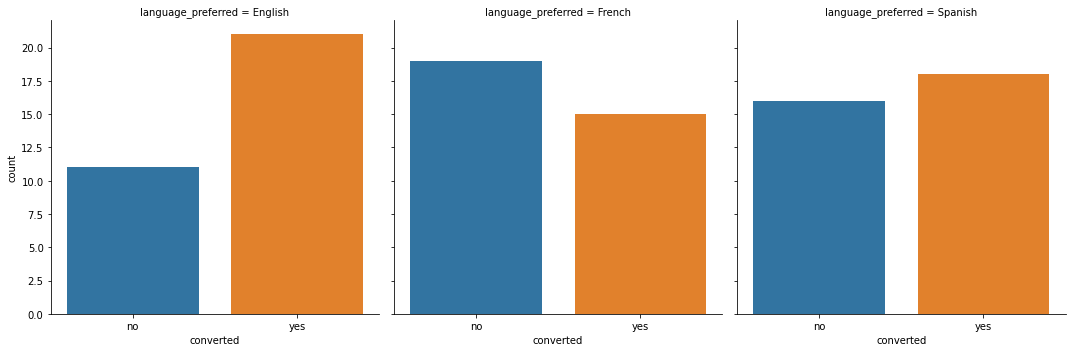

In [45]:
sns.catplot(data = data, x = 'converted', col = 'language_preferred', kind = 'count')

### Observation:
Those who speak French and Spanish don't seem to be affected very much by the converted status, however users who speak English are more likely to have their experience affected by it.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:
- $H_0:$ Null Hypothesis:  The converted status is independent of the preferred language. 
- $H_a:$ Alternate Hypothesis: The converted status depends on the preferred language.

### Step 2: Select Appropriate test

Observable characteristics:
- Categorical Variables: language_preferred and converted.
- As we need to check the independence between converted status and preferred language, the test selected is the Chi Square Test for Independence and check the data for those two variables.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [46]:
# create a contingency table showing the distribution of the two categorical variables
lang_conv = pd.crosstab(data['converted'],data['language_preferred'])
lang_conv

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [47]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lang_conv)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [48]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The converted status is independent of the preferred language.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [49]:
# create a new DataFrame for users who got served the new page
data_new = data[data['landing_page'] == 'new']

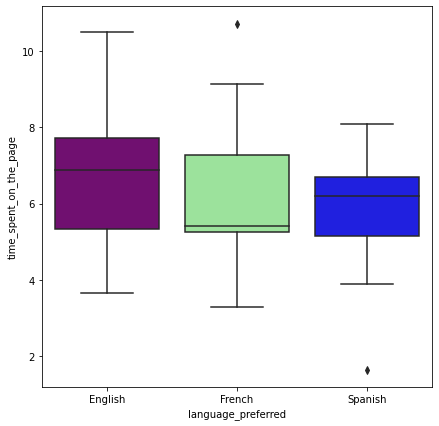

In [50]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(7,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = data_new, palette= 
['purple','lightgreen','blue'])
plt.show()

In [51]:
# calculate the mean time spent on the new page for different language users
data_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Observation:
The average time spent on the pages seems relatively the same among the different language preferences.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$, $\mu_2$ and $\mu_3$ be the be the means of time spent on the new page by English, 
French and Spanish users respectively.
Mathematically, the null and alternate hypotheses can be written as

$H_0: \mu_1 = \mu_2 = \mu_3 $

$H_a:$ at least one of these means if not the same


### Step 2: Select Appropriate test

Since the test for means for three populations, One-way ANOVA F test is selected.  In order to decide we first need to verify the normality and equality of variance
- For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
- For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

$H_0:$ Time spent on the new landing page follows a normal distribution

$H_a:$ Time spent on the new landing page does not follow a normal distribution

#### Levene’s test

We will test the null hypothesis

$H_0$: All the population variances are equal against the alternative hypothesis

$H_a$: At least one variance is different from the rest

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

#### Shapiro-Wilk’s test

In [52]:
# Assumption 1: Normality
# find the p-value
w, p_value = stats.shapiro(data_new["time_spent_on_the_page"]) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large (0.8 > 0.05), we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

In [53]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
# find the p-value
statistic, p_value = stats.levene(data_new[data_new["language_preferred"] == "English"]["time_spent_on_the_page"],
                                  data_new[data_new["language_preferred"] == "Spanish"]["time_spent_on_the_page"],
                                  data_new[data_new["language_preferred"] == "French"]["time_spent_on_the_page"])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large (0.47 > 0.05), we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 5: Calculate the p-value

In [54]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(data_new.loc[data_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))


The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [55]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

 The time averages on the new landing page for the different languages are relatively the same

## Conclusion and Business Recommendations

### Exploratory Data Analysis
- There are 2 groups: Control & Treatment that have 50 users each. All the users in the control group were shown the old landing page, while all the users in the treatment group were shown the new landing page.
- Overall, the average time spent on the web pages is 5.4 minutes.
- Since 54% of users wre converted to the new web page, the users spent more time on the new web page compared to the old one.
- There are apporximately equal number of English, French and Spanish preferring users (32, 34 and 34) in the dataset. Conversion when on the new landing page is very strong among users prefering French and marginally poor for users prefering English.  
- The barplot were shown the new landing page spent more time on the page than those who were shown the old page.
- The treatment group (those exposed to the new landing page) are more likely to spend more time on the page.
- Users that coverted to subscribers seem to have spent a greater amount of time on the landing page as compared to those who did not convert.
- The time spent on the page seems to be very similar across the preferred languages.
- Though the difference is small, more English-language readers became paying subscribers than those reading in each of the other two languages.

### Statistical analysis

- With a two-sample T-test for equality of means and unequal standard deviation, we found that the average time spent on the new landing page is greater than the average time spent on the old landing page. 
- Users of English, French, and Spanish spend almost the similar mean time 6.66 mins, 6.19 mins, and 5.83 mins, respectively.
- Using a two proportion Z-test, we obtained statistical evidence supporting the assertion that the new landing page's conversion rate (66%) is greater than the conversion rate (42%) of the old landing page.
- Using a chi-square test, we have collected sufficient data to draw the conclusion that the language used has no noticeable impact on the percentage of visitors who become paying subscribers or the total time spent on the website.
- One-way ANOVA Test results show no significant difference in average time spent on page between English, Spanish, and French users. Normality and equality of variances assumptions for ANOVA were tested using Shapiro-Wilk’s test and Levene’s test respectively.

### Recommendations
- Creating a new landing page was a smart decision for the organization, as our data shows that subscribers have increased and users are spending more time there.
- Even while the mean time spent by English preferring users on the new landing page is higher than old landing page, and the same was true for Spanish and French speakers, the conversion rate was somewhat lower on the new landing page, which is something that should be addressed to the design team. Therefore, we need more research and information collection.